In [5]:
import numpy as np
import pandas as pd
import random
import torch
import os
import glob
import matplotlib.pyplot as plt

In [34]:
def show_image(image):
    plt.figure(figsize=(20, 20))
    plt.imshow(image)
    plt.show()

In [35]:
file_name = "00034abb3629.npy"
sample_data = np.load(f"../train/0/{file_name}")
sample_data = np.vstack(sample_data).transpose((1, 0)).astype(np.float32)[:, :, np.newaxis]
rate = 3.5
mean = np.mean(sample_data)
std = np.std(sample_data)
sample_data = np.clip(sample_data, mean-rate*std, mean+rate*std)
sample_data.shape

(256, 1638, 1)

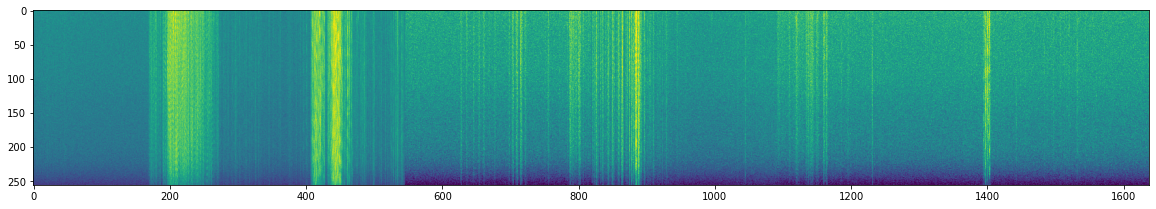

In [36]:
show_image(sample_data)

In [38]:
target_data = np.load("../train/0/0004300a0b9b.npy")
target_data = np.vstack(target_data).transpose((1, 0)).astype(np.float32)[:, :, np.newaxis]
mean = np.mean(target_data)
std = np.std(target_data)
target_data = np.clip(target_data, mean-rate*std, mean+rate*std)
target_data.shape

(256, 1638, 1)

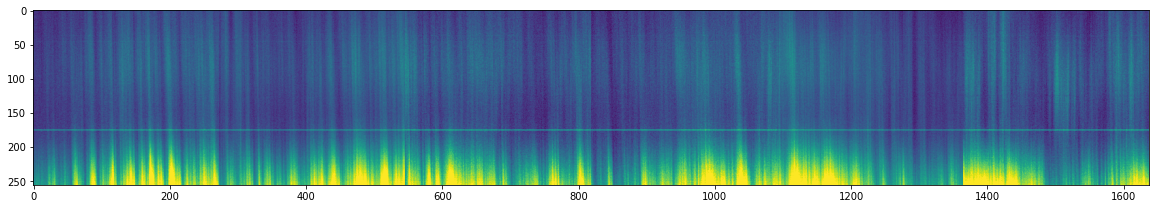

In [39]:
show_image(target_data)

(256, 1638, 1)


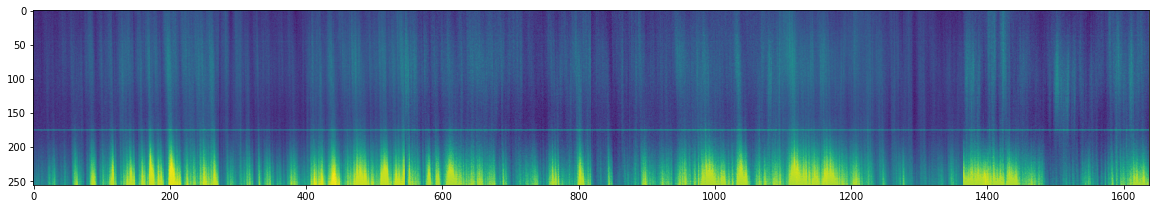

In [53]:
alpha = 0.4
lam = np.random.beta(alpha, alpha)
mixed_x = lam * sample_data + (1 - lam) * target_data
print(mixed_x.shape)
show_image(mixed_x)